In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# 그래프 그리기
%matplotlib inline
# 폰트설정
plt.rc('font', family = 'Malgun Gothic')
# 마이너스 폰트 깨짐 현상 해결
plt.rc('axes', unicode_minus = False)

# 폰트선명히
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/소상공인시장진흥공단_상가업소정보_의료기관_201909/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding = 'utf8', low_memory = False)
df.shape

(91335, 39)

In [3]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

 * 칼럼 총 39개 중 데이터 타입은 문자형 23개 ,정수형 7개, 소수점 9개
 * 결측값이 존재하는 것을 알 수 있다.

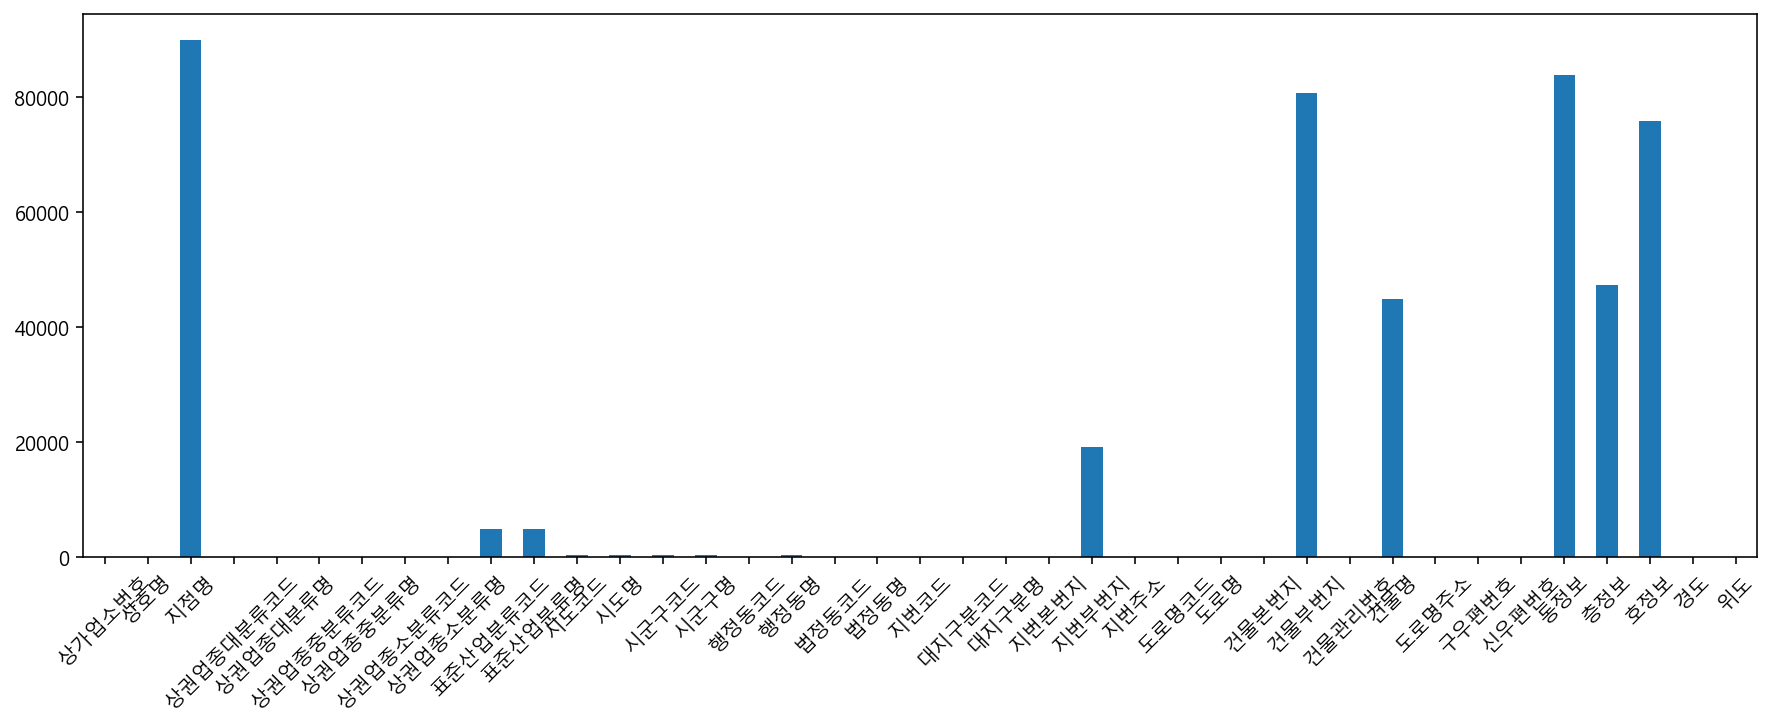

In [5]:
# 각 칼럼의 결측치 개수 파악
null_count = df.isnull().sum()
null_count.plot.bar(figsize = (15, 5), rot = 45)
# bar로 하면 다음과 같은 결과 출력
# barh는 x축 y축 반전

In [11]:
# reset_index()는 데이터프레임으로 만듦
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [13]:
df_null_count.columns = ['칼럼 명', '결측치 수']
df_null_count.head()

,칼럼 명,결측치 수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [17]:
df_null_count.sort_values(by = "결측치 수", ascending = False).head(10)

,칼럼 명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [19]:
df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [22]:
df_null_count_top = df_null_count.sort_values(by = "결측치 수", ascending = False).head(10)
drop_columns = df_null_count_top["칼럼 명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [25]:
display(df[drop_columns].head())
display(df[drop_columns].shape)

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


(91335, 10)

In [27]:
print(df.shape)
df = df.drop(drop_columns, axis = 1)    # axis = 0 이 디폴트인데 행을 기준으로 제거한다.
print(df.shape)

(91335, 39)
(91335, 29)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [30]:
df["위도"].mean()

36.62471119236673

In [31]:
df["위도"].median()

37.23465231770329

In [32]:
df["위도"].max()

38.499658570559795

In [33]:
df["위도"].min()

33.2192896688307

In [34]:
df["위도"].count()

91335

In [36]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [37]:
df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [39]:
df.describe(include = "object")    # 결측치 데이터는 자동 제외

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


 # 중복제거한 값을 출력

In [41]:
# '상권업종대분류명'

df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [43]:
df['상권업종대분류명'].nunique()

1

In [44]:
# '상권업종중분류명'
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [45]:
df['상권업종중분류명'].nunique()

5

In [53]:
# '상권업종소분류명'
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [54]:
df['상권업종소분류명'].nunique()
#len(df['상권업종소분류명'].unique()

34

 # 그룹화 된 요약과 시각화

In [72]:
city = df['시도명'].value_counts()

In [73]:
city_normalize = df['시도명'].value_counts(normalize = True)

,응답 수,비율
경기도,21374,0.234993
서울특별시,18943,0.208266
부산광역시,6473,0.071166
경상남도,4973,0.054675
인천광역시,4722,0.051915
대구광역시,4597,0.050541
경상북도,4141,0.045528
전라북도,3894,0.042812
충청남도,3578,0.039338
전라남도,3224,0.035446


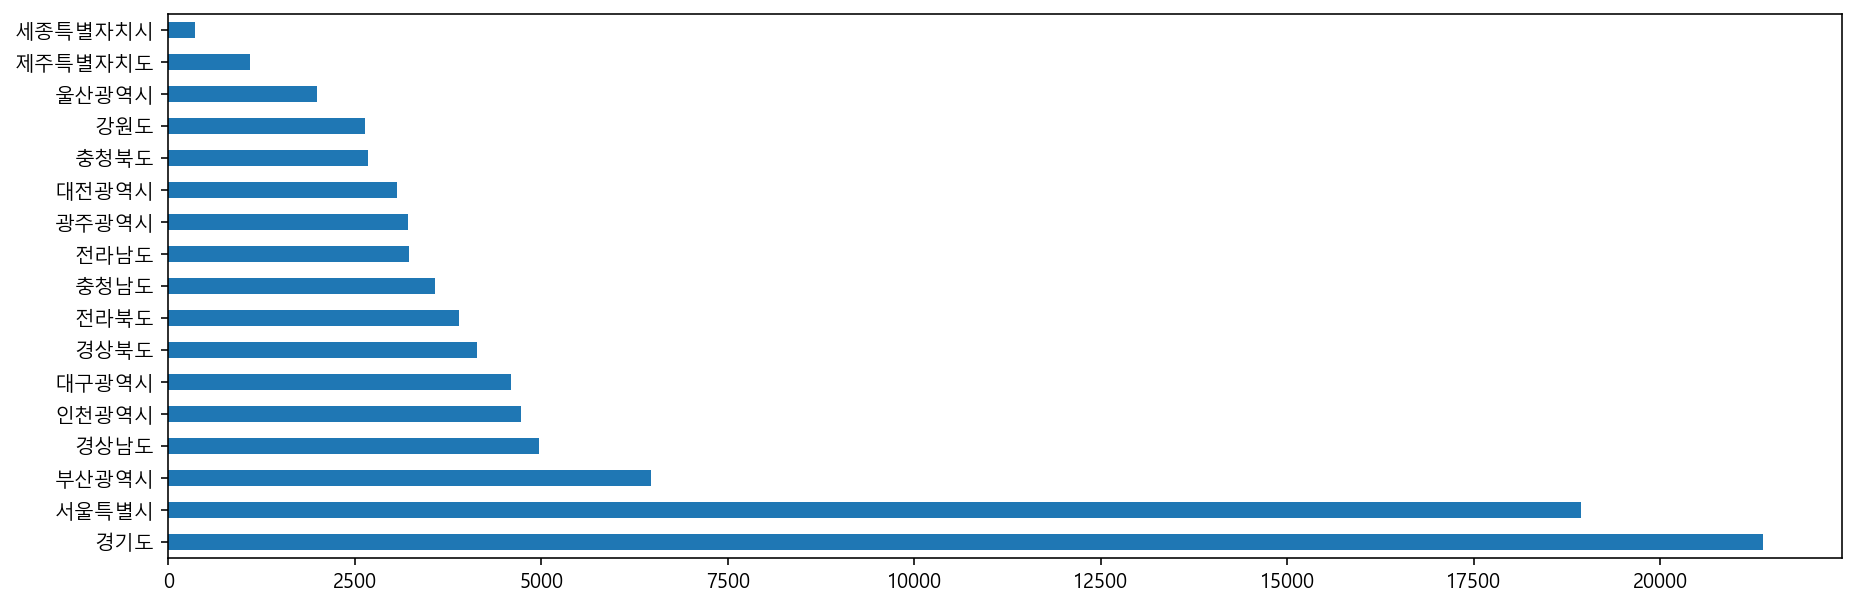

In [78]:
city_count = pd.DataFrame(city)
city_percent = pd.DataFrame(city_normalize)

city_df = city_count.merge(city_percent, left_index = True, right_index = True)
city_df.columns = ['응답 수', '비율']

display(city_df)
display(city.plot.barh(figsize = (15, 5)))

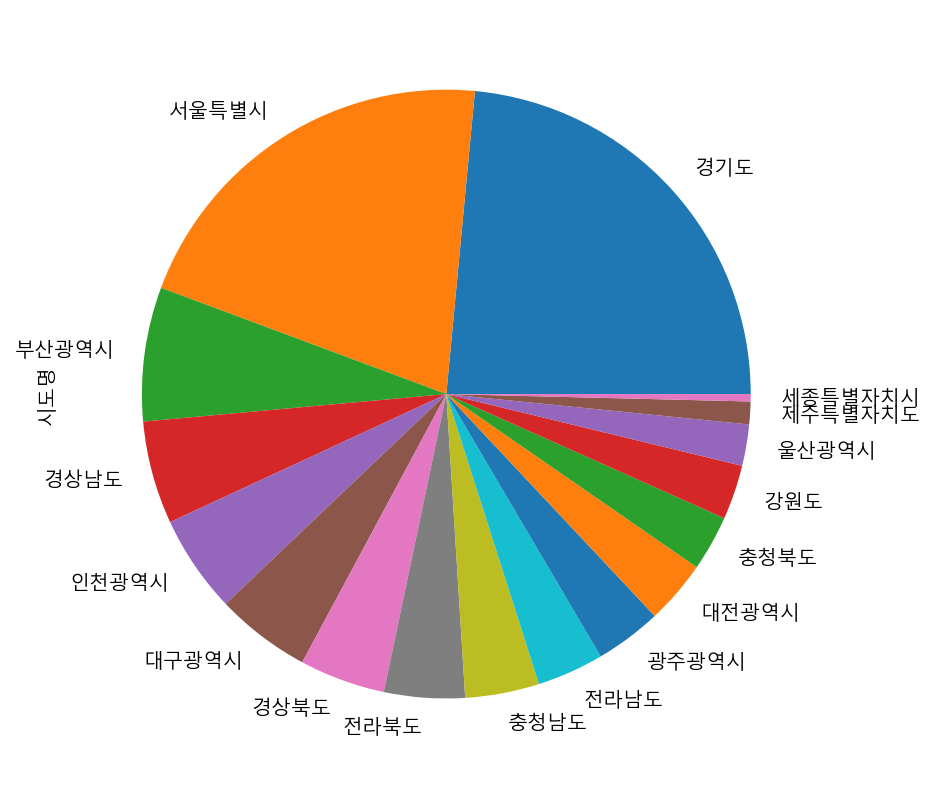

In [79]:
city.plot.pie(figsize = (7, 7))

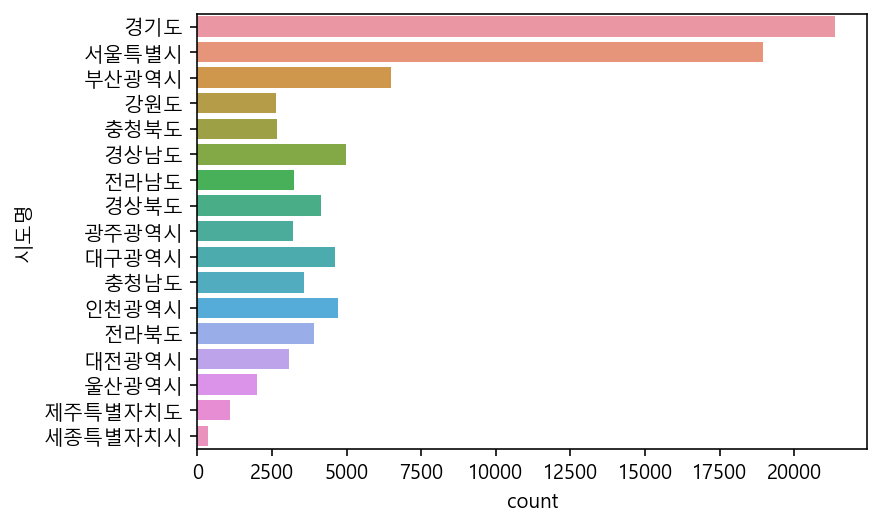

In [83]:
# 'c'로 지정하지 않고 그냥 출력하면 텍스트와 같이 그래프가 출력
# seaborn은 일부 그래프가 지원되지 않지만 디폴트가 보기 좋음
c = sns.countplot(data = df, y = '시도명')

In [85]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [94]:
a = df['상권업종중분류명'].value_counts()

In [95]:
b = df['상권업종중분류명'].value_counts(normalize = True)

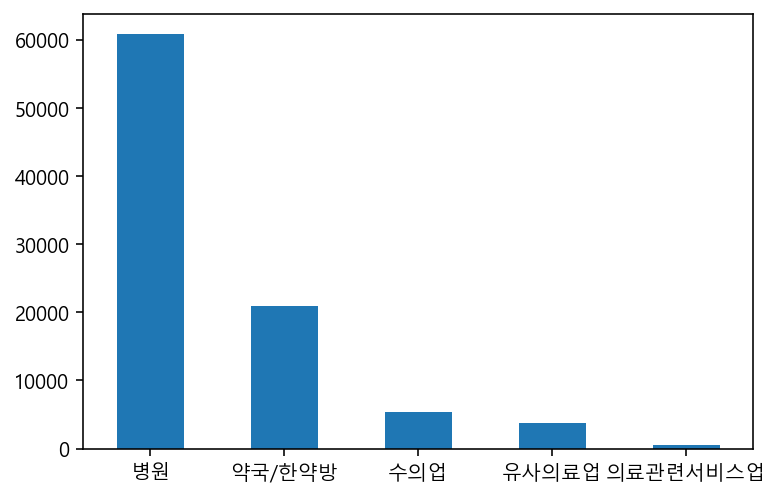

In [99]:
# 판다스 시각화 막대그래프 사용
a.plot.bar(rot = 0)

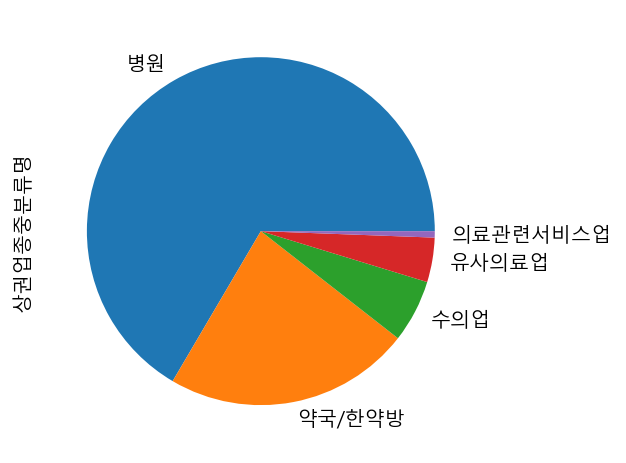

In [101]:
# 판다스 시각화 원그래프 사용
b.plot.pie()

In [105]:
d = df['상권업종소분류명'].value_counts()

In [106]:
e = df['상권업종소분류명'].value_counts(normalize = True)

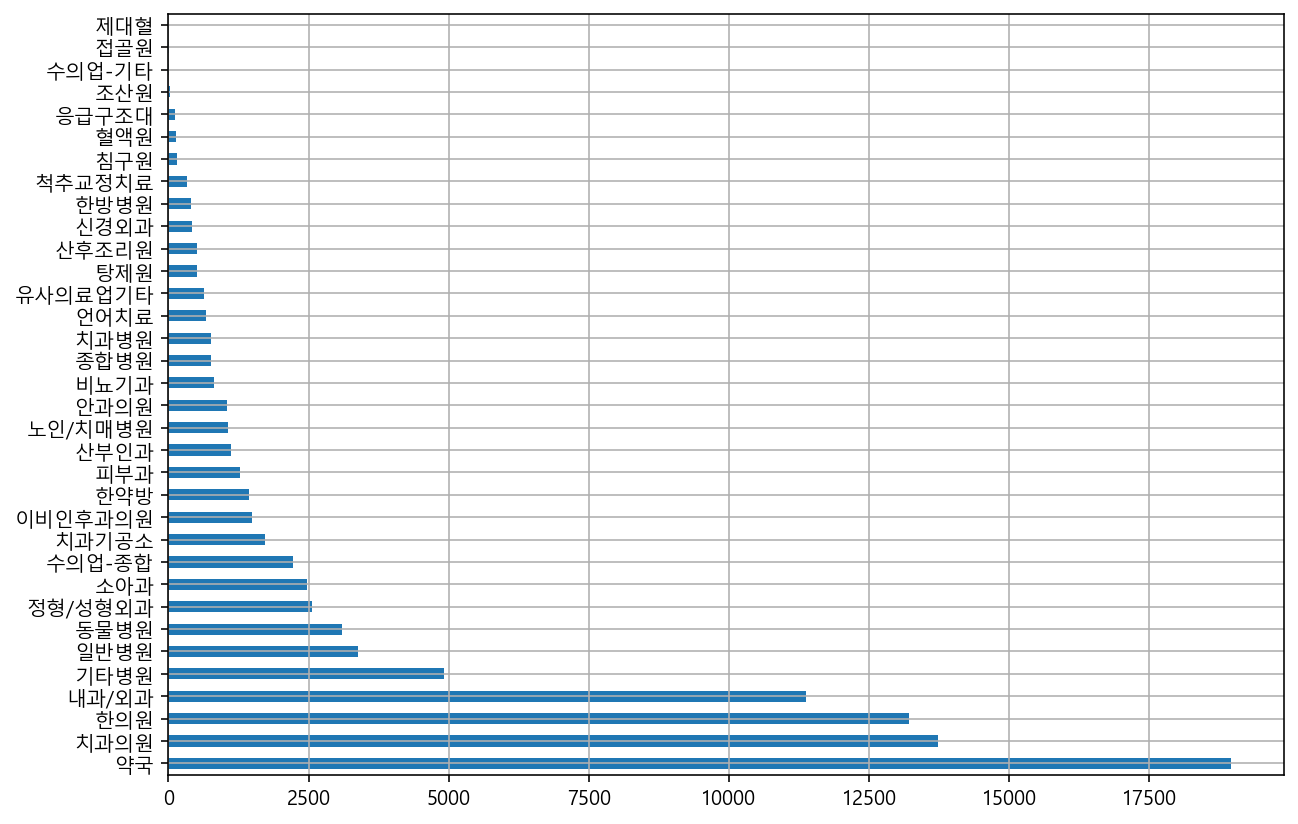

In [112]:
d.plot.barh(figsize = (10, 7), grid = True)